<a href="https://colab.research.google.com/github/Akku1508/Twitter-Sentimental-Analysis/blob/main/23004_Aakriti_Kumari_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import seaborn as sns
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d kazanova/sentiment140kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset

401 - Unauthorized


In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=689192741e7e9bab8e81b90b463cb1cfef17ff9ccb7615d2dc401e190d4d0b44
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
!unzip sentiment140.zip

In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"


In [ ]:
dataframe = pd.read_csv("twittersentiments.csv",encoding =('ISO-8859-1'),names=DATASET_COLUMNS)

In [ ]:
print(dataframe)

         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww

In [ ]:
dataframe.shape

(1600000, 6)

In [ ]:
print("Dataset size:", len(dataframe))


Dataset size: 1600000


In [ ]:
dataframe.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [ ]:
dataframe.tail(10)

,target,ids,date,flag,user,text
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


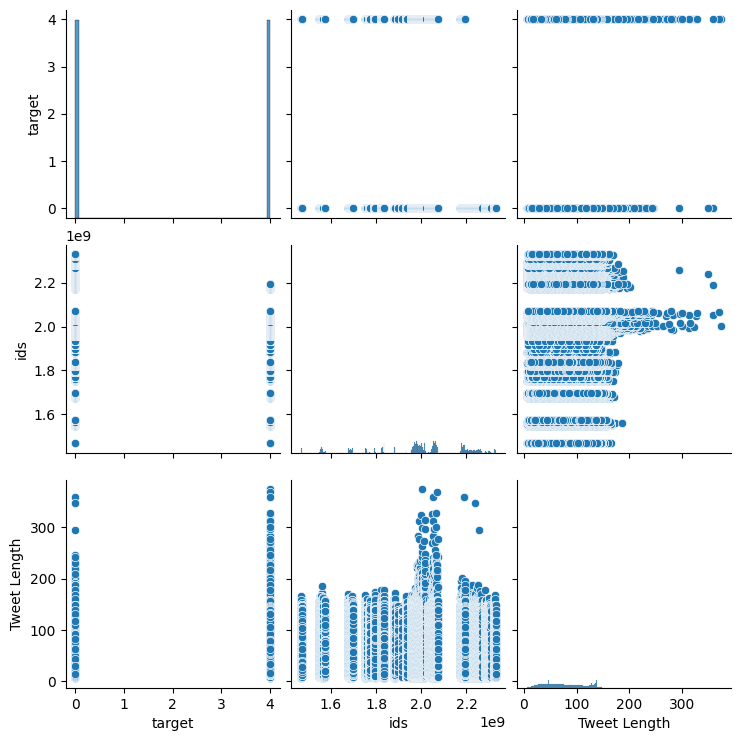

In [ ]:
sns.pairplot(dataframe)

**1)Are there any missing values and duplicate instances in the dataset? If so, how should we handle them?**


In [ ]:
dataframe.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

**This implies that there is no null value in the given dataset twittersentiments**

In [ ]:
duplicate = dataframe[dataframe.duplicated()]
print("Duplicate Rows :")
duplicate


Duplicate Rows :


,target,ids,date,flag,user,text


**This means there is no duplicate rows in the given dataset**

**SUMMARYSING THE ANALYSIS AND OBSERVATIONS**
*   If there is NaN values then we can apply three methods


    1.Dropping rows (anywhere in row there is nan drop the whole row)#usless technique.

    2.Dropping column(entire column):no. of columns is decresed but the rows are same if 90% data of column is missing then drop column..

    3.Estimatation (Approximate):Fill with some value if the albhates are there fill with mode(most occuring) value and if there is number fill with avg of columns but estimation could be a wrong assumption also..


*   If there is Duplicate instances (rows or entries) present in the dataset then drop the duplicate rows



**2) Can we identify any patterns or trends in the tweets based on the date of posting? How does the distribution of sentiment classes (positive, negative, neutral) look like?**

In [ ]:
target_cnt = Counter(dataframe.target)
print(target_cnt)

Counter({0: 800000, 4: 800000})


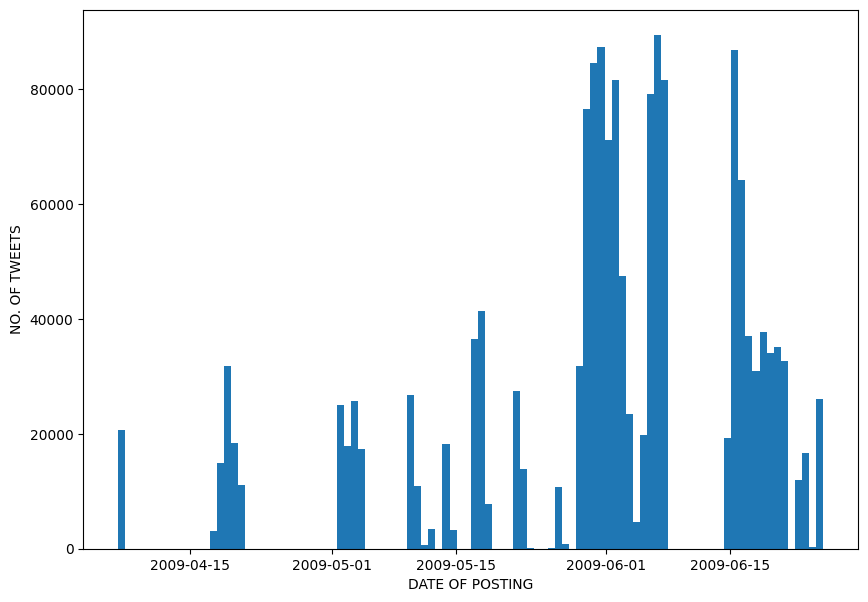

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(dataframe['date'],bins=100)
plt.xlabel("DATE OF POSTING")
plt.ylabel("NO. OF TWEETS")
plt.show()

[Text(0, 0.5, 'NO. OF TWEETS')]

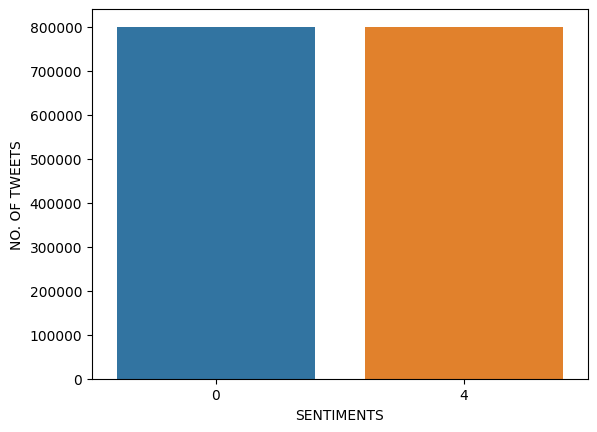

In [ ]:
sent=sns.countplot(x=dataframe['target'])
sent.set(xlabel='SENTIMENTS')
sent.set(ylabel='NO. OF TWEETS')


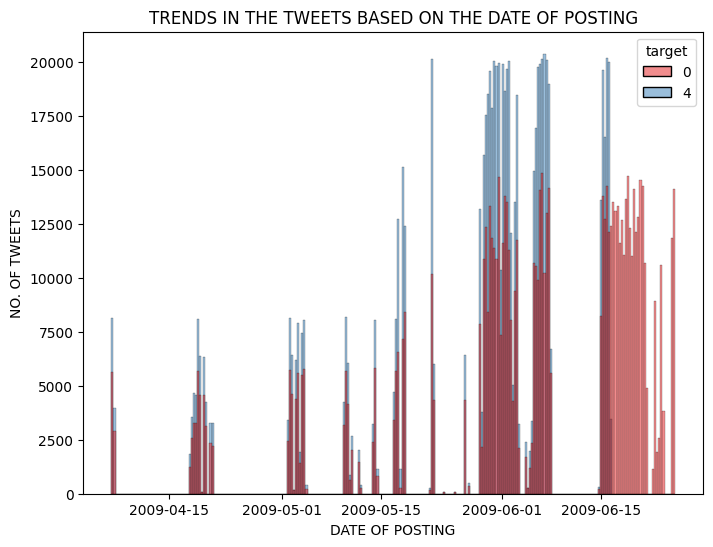

In [ ]:
plt.figure(figsize=(8, 6))
SNS=sns.histplot(x=dataframe['date'],hue=dataframe['target'],palette="Set1")
SNS.set(title='TRENDS IN THE TWEETS BASED ON THE DATE OF POSTING')
SNS.set(xlabel='DATE OF POSTING')
SNS.set(ylabel='NO. OF TWEETS')
plt.show()

 **SUMMARYSING THE ANALYSIS AND OBSERVATIONS**

    From the above graph following observations could be made:-

    1) In the given dataset positive tweets were always in large no than Negative one on every date of posting till 15 June 2009.
    2) After 15 June 2009 there are enormous negative tweets had been posted.
    3) Around 1 June 2009 the usage of twitter reapidly increased as large no. of tweets were posted.
     




**3)Can we identify any relationships between the length of tweets and their corresponding sentiment? Provide correlation plot.**

In [ ]:
dataframe['Tweet Length']=dataframe['text'].astype(str).apply(len)

In [ ]:
correlation_matrix = dataframe.corr()
correlation_matrix



<ipython-input-17-3688ba69ecfa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


,target,ids,Tweet Length
target,1.000000,-0.261601,-0.005809
ids,-0.261601,1.000000,0.002562
Tweet Length,-0.005809,0.002562,1.000000


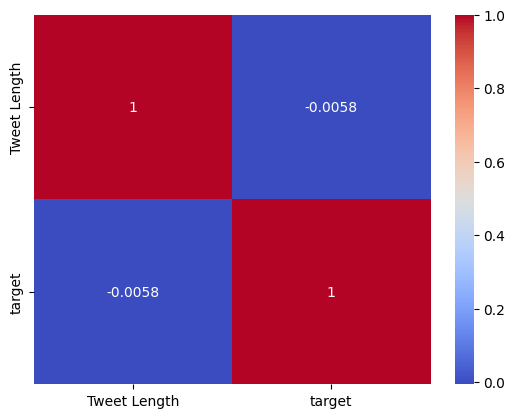

In [ ]:
correlation = dataframe['Tweet Length'].corr(dataframe['target'])
sns.heatmap(dataframe[['Tweet Length', 'target']].corr(), annot=True, cmap='coolwarm')

plt.show()



In [ ]:
sns.scatterplot(data=dataframe,x='date')

  **SUMMARYSING THE ANALYSIS AND OBSERVATIONS**

  
    A correlation coefficient of -0.0058 indicates a very weak negative correlation between the two variables. The negative sign indicates that there is an inverse relationship between the variables, but the coefficient value being close to zero suggests that this relationship is extremely weak.

    In practical terms, it means that there is little to no linear association or predictable pattern between the two variables. The variables do not move in a consistent direction in relation to each other. As one variable increases, the other variable does not consistently decrease, and vice versa.

    In this case of a coefficient like -0.0058, it implies a negligible relationship between the variables and would not typically be considered meaningful for most analyses.

**4) How should we encode the categorical variable for sentiment classes (positive, negative, neutral)? Binary encoding or one-hot encoding? Perform the encoding.**

In [ ]:
label_mapping = {'negative':0,'positive':4,'neutral':2}
dataframe['target'] = dataframe['target'].replace(label_mapping)


In [ ]:
encoded_df = pd.get_dummies(dataframe, columns=['target'])
print(encoded_df)


                ids                          date      flag             user  \
0        1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
...             ...                           ...       ...              ...   
1599995  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599996  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599997  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599998  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599999  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

  **SUMMARYSING THE ANALYSIS AND OBSERVATIONS**
  
    We ahould use One-hot encoding as One-hot encoding represents each category as a binary feature, where a value of 1 indicates the presence of the category and 0 indicates its absence.

**5) Do we need to remove any special characters, URLs, or mentions from the tweets before analysis? How should we handle emoji or emoticons in the text data? Should we remove or encode them?**

In [ ]:
import pandas as pd
import emoji
def encode_emojis(text):
    encoded_text = emoji.demojize(text)
    return encoded_text
def remove_emojis(text):
    removed_text = emoji.get_emoji_regexp().sub('', text)
    return removed_text
dataframe['Encoded_Text'] = dataframe['text'].apply(encode_emojis)
print(dataframe)


         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  \
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Aww

In [ ]:
dataframe.tail(10)

,target,ids,date,flag,user,text,Encoded_Text,Tweet Length
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back,WOOOOO! Xbox is back,21
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...,@rmedina @LaTati Mmmm That sounds absolutely ...,133
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,33
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS,@SCOOBY_GRITBOYS,17
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha...","@Cliff_Forster Yeah, that does work better tha...",132
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...,56
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...,65
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,happy #charitytuesday @theNSPCC @SparksCharity...,62


  **SUMMARYSING THE ANALYSIS AND OBSERVATIONS**



    1)Removing special characters helps simplify the text and focuses on the essential content for sentiment classification.
    
    2)URLs in tweets often contain website links or shortened URLs, which may not provide meaningful insights for sentiment analysis. Removing URLs eliminates irrelevant information and potential biases introduced by external websites, allowing you to concentrate on the sentiment expressed in the tweet itself.
    
    3)In sentiment analysis, it is often more effective to focus on the sentiment expressed towards a particular topic or entity rather than individual users. Removing mentions helps generalize the sentiment analysis and avoids bias introduced by specific users.

    4)Encoding emojee as Unicode: Emojis are Unicode characters, so we can choose to keep them as Unicode symbols in your text data. This allows  to preserve the visual representation of emojis while analyzing the text.

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions






    Data Preprocessing:
    1. Clean the text data by removing special characters, punctuation, and converting text to lowercase if necessary.
    2. Perform any necessary text normalization techniques like stemming or lemmatization.
    3. Handle missing values, if any, by imputing or removing them.

    Feature Engineering:
    1. Extract relevant features from the text data, such as word count, character count, or other domain-specific features that could be useful for sentiment analysis.
    2. Transform or encode categorical variables, if any, using appropriate techniques like one-hot encoding or ordinal encoding.
    3. Create additional features based on domain knowledge or data analysis insights.

    Split Dataset:
    1. Split the dataset into training and testing sets, using an 80:20 ratio or any other suitable ratio based on your specific requirements. This can be done using scikit-learn's `train_test_split` function.

    Model Selection:
    1. Choose an appropriate machine learning algorithm for sentiment analysis, such as logistic regression, support vector machines, or a text classification algorithm like Naive Bayes or a neural network-based model.

    Model Training:
    1. Train the selected model using the training dataset. Fit the model to the training data and learn the underlying patterns and relationships.

    Model Evaluation:
    1. Evaluate the trained model's performance on the testing dataset. Calculate metrics such as accuracy, precision, recall, and F1-score to assess the model's predictive performance.

    Fine-tune the Model:
    1. Adjust the hyperparameters of the selected model using techniques like cross-validation or grid search to find the best combination of hyperparameters that maximize performance.

    Make Predictions:
    1. Once the model is fine-tuned and optimized, use it to make predictions on new, unseen data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
#PREPROCESSING
import re
d=",.!?/&-:;@'..."
"["+"\\".join(d)+"]"
s=x_train[0]
s=' '.join(w for w in re.split("["+"\\".join(d)+"]",s) if w)

for i in s.split():
  if len(i)>1: print(i,vectorizer.vocabulary_[i.lower()])

It 257841
was 558260
rainy 433424
and 57443
cloudy 129399
in 251981
the 517082
Windy 565913
City 126950
today 528707
amp 56126
WF 561897
customers 142868
had 226851
some 486023
serious 467402
SAD 455284
issues 257700
with 566694
them 519964
when 562752
is 256885
summer 501487
coming 132544


In [ ]:
#SPLITING THE DATASET
x=dataframe.text.values
y=dataframe.target.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
#FEATURE ENGINEERING
vectorizer= CountVectorizer()
vectorizer.fit(x_train)
X_train=vectorizer.transform(x_train)
X_test=vectorizer.transform(x_test)

In [ ]:
print("Before vectorising:\n",x_train[0],'\nAfter vectorising:\n',X_train[0])

Before vectorising:
 It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming?  
After vectorising:
   (0, 56126)	1
  (0, 57443)	1
  (0, 126950)	1
  (0, 129399)	1
  (0, 132544)	1
  (0, 142868)	1
  (0, 226851)	1
  (0, 251981)	1
  (0, 256885)	1
  (0, 257700)	1
  (0, 257841)	1
  (0, 433424)	1
  (0, 455284)	1
  (0, 467402)	1
  (0, 486023)	1
  (0, 501487)	1
  (0, 517082)	1
  (0, 519964)	1
  (0, 528707)	1
  (0, 558260)	1
  (0, 561897)	1
  (0, 562752)	1
  (0, 565913)	1
  (0, 566694)	1


In [ ]:
#MODEL SELECTING OR CREATING A MODEL
classifier = LogisticRegression(max_iter=1000)

#MODEL TRAINING
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
classifier.coef_.round(2)[0][0]

-0.22

In [ ]:
classifier.intercept_

array([0.31350624])

In [ ]:
#MODEL EVALUATION
score=classifier.score(X_test,y_test)
print("Accuracy:",score)

Accuracy: 0.800271875


In [ ]:
#TESTING
tweet='my whole body feels itchy and like its on fire'
vectTweet=vectorizer.transform(np.array([tweet]))
prediction=classifier.predict(vectTweet)
print('Tweet is','positive'if prediction[0]==4 else 'negative')

Tweet is negative


In [ ]:
tweetlist=["spring break in plain city... it's snowing","Mondays are the worst..."]
vectTweet=vectorizer.transform(np.array(tweetlist))

prediction=classifier.predict(vectTweet)
for enum,i in enumerate(tweetlist):
  print(i,'----> This tweet is','positive' if prediction[enum]==4 else 'negative')

spring break in plain city... it's snowing ----> This tweet is negative
Mondays are the worst... ----> This tweet is negative


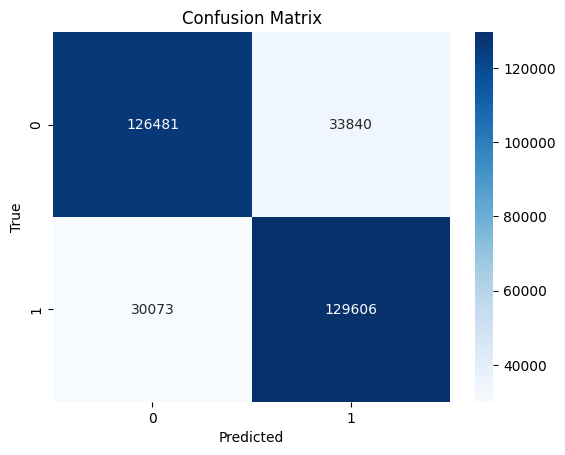

In [ ]:
#PREDICTIONS
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()